# 2-12 프로젝트 1: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
## (1) 데이터 가져오기

[데이터셋 설명](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)  
데이터를 보면 age, sex등등 모든 feature가 우리가 아는 데이터와 형태와는 조금 다른데, 이 데이터가 TOY데이터라 평균을 0, 표준편차를 1로 조정된 모델이다.

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()



당뇨병 데이터셋의 모양을 보아하니 데이터가 442개이고 특성이 10개임을 확인할 수 있다

In [2]:
print(diabetes.data.shape)

(442, 10)


diabetes의 데이터를 df_x에, target을 df_y에 저장합니다

In [3]:
df_x, df_y = load_diabetes(return_X_y=True)

df_x 값이 numpy array인지 확인합니다

In [4]:
type(df_x)

numpy.ndarray

x 와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,
 random_state=23)

입력 데이터 개수에 맞는 가중치 $\mathbb{W}$ 와 $b$를 준비해주세요.
모델 함수를 구현해주세요

In [6]:
import numpy as np
# 입력 특성이 10개
W = np.random.rand(10)
b = np.random.rand()

In [7]:
def model(X, W, b):
    pred = np.sum(X * W, axis=1) + b
    return pred

손실 함수 `loss` 정의하기

In [8]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    pred = model(X, W, b)
    L = MSE(pred, y)
    return L

In [9]:
def gradient(X, W, b, y):
    N = len(W)

    y_pred = model(X, W, b)

    dW = 1 / N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

기울기를 구하는 `gradient`함수 구현하기  
하이퍼 파라미터인 학습률 설정하기

In [10]:
LEARNING_RATE = 1e-2
losses = []
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 20144.2881
Iteration 20 : Loss 15152.7786
Iteration 30 : Loss 11762.6985
Iteration 40 : Loss 9447.0397
Iteration 50 : Loss 7853.5734
Iteration 60 : Loss 6746.7328
Iteration 70 : Loss 5968.8378
Iteration 80 : Loss 5414.2247
Iteration 90 : Loss 5011.9817
Iteration 100 : Loss 4714.4272
Iteration 110 : Loss 4489.4191
Iteration 120 : Loss 4315.2194
Iteration 130 : Loss 4177.0643
Iteration 140 : Loss 4064.8726
Iteration 150 : Loss 3971.7132
Iteration 160 : Loss 3892.7802
Iteration 170 : Loss 3824.7063
Iteration 180 : Loss 3765.1020
Iteration 190 : Loss 3712.2466
Iteration 200 : Loss 3664.8801
Iteration 210 : Loss 3622.0621
Iteration 220 : Loss 3583.0771
Iteration 230 : Loss 3547.3694
Iteration 240 : Loss 3514.4986
Iteration 250 : Loss 3484.1089
Iteration 260 : Loss 3455.9081
Iteration 270 : Loss 3429.6522
Iteration 280 : Loss 3405.1348
Iteration 290 : Loss 3382.1794
Iteration 300 : Loss 3360.6334
Iteration 310 : Loss 3340.3641
Iteration 320 : Loss 3321.2553
Iteration 330 

learning rate를 수정해 가며 3000 이하의 loss 값을 구하였다. 
여기서 test data의 loss값을 구해보자

In [11]:
losses[-1]

2891.111348965355

In [12]:

loss(X_test, W, b, y_test)

3167.241782431873

x축에는 X 데이터의 첫 번째 컬럼인 age가 정규화된 값을, y축에는 정답인 target값과 모델이 예측한 값을 넣어서 비교하였다

<function matplotlib.pyplot.show(close=None, block=None)>

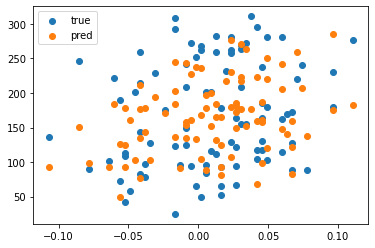

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], model(X_test, W, b), label='pred')
plt.legend()
plt.show

train 데이터셋도 어떻게 훈련되었는지 확인해 보았다

<function matplotlib.pyplot.show(close=None, block=None)>

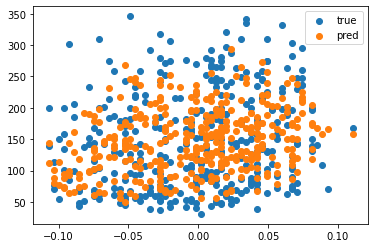

In [14]:
plt.scatter(X_train[:, 0], y_train, label="true")
plt.scatter(X_train[:, 0], model(X_train, W, b), label='pred')
plt.legend()
plt.show

### 회고

+ 당뇨병 수치를 예측하는 이번 플젝은 노드 앞부분과 거의 흡사해서 비교적 손쉽게 진행할 수 있었다. 데이터를 확인하였을 때 모든 데이터가 정규화가 되어있어서 매우 친절한 데이터라고 생각했다. 정규화 여부가 학습에 큰 영향을 미치는 것일지 궁금하다.. 

+ loss값을 3000 이하로 맞춰야 한다고 하길래 긴장했지만 learning rate를 적당히 조절한 것 만으로도 3000 이하의 값을 손쉽게 찾을 수 있었다. 변수인 column들을 골라가며 학습을 해보면 좋겠지만 공부할 내용은 계속 쌓이고 있으니 빨리 넘어가자 ㅎㅎ 아마 이후 노드에서 시도해볼 기회가 있을 것이다.

+ matplotlib로 그린 그래프는 뭔가 마음에 안든다. 다음 익스는 seaborn을 이용해서 예쁘게 그려보자!